# Datos de diabetes


In [3]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # gráficos 
import seaborn as sns # mapa de calor
import numpy as np # para cualuqier  manejo numerico

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/sergiomath/dataScience/main/Proyectos/Diabetes/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Get familier with dataset structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## correalciones

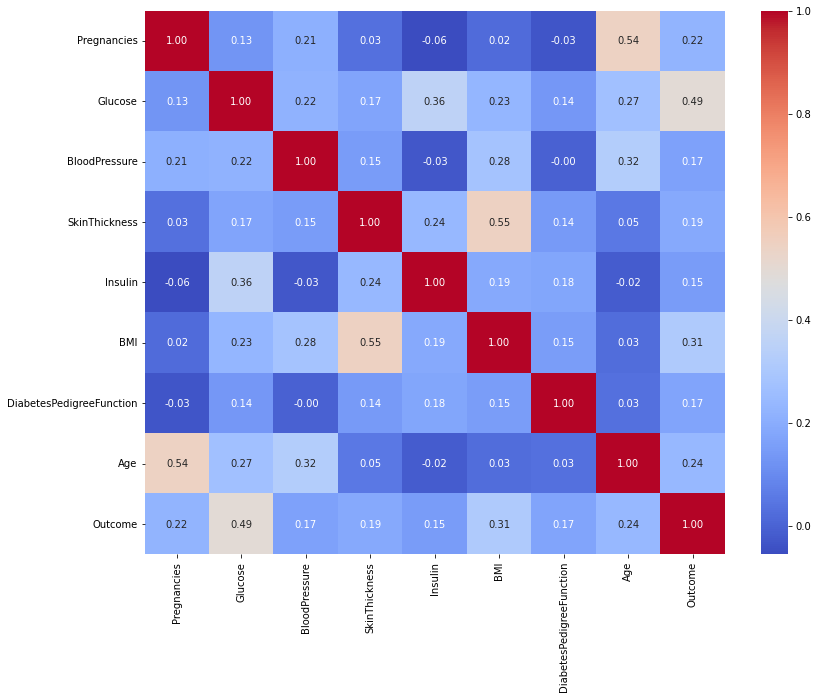

In [31]:
##### matriz de correlaciones datos originales
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

> - notamos que no existe correlación fuerte entre las varibles y tampoco de las varibles con la respuesta aun así miramos las que tiene una mayor correlacion con la repuesta pra el analisis


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

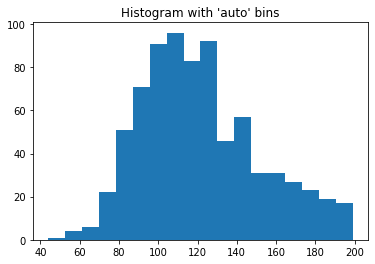

In [32]:
# histograma glucosa
Glucose = df['Glucose']
plt.hist(Glucose, bins='auto')
plt.title("Histogram with 'auto' bins")
plt.show
#print(Pregnancies)

<function matplotlib.pyplot.show(*args, **kw)>

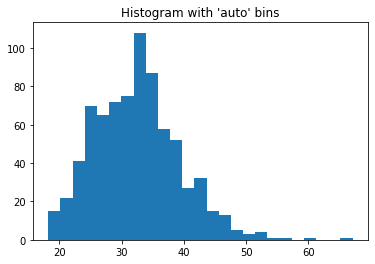

In [33]:
# histograma BMI
BMI = df['BMI']
plt.hist(BMI, bins='auto')
plt.title("Histogram with 'auto' bins")
plt.show
#print(Pregnancies)

<function matplotlib.pyplot.show(*args, **kw)>

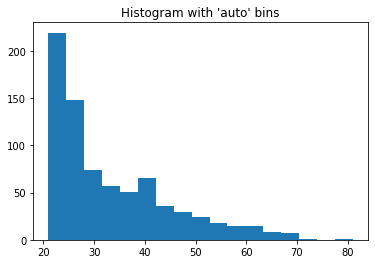

In [34]:
# histograma edad
Age = df['Age']
plt.hist(Age, bins='auto')
plt.title("Histogram with 'auto' bins")
plt.show
#print(Pregnancies)

In [ ]:
df[df['BloodPressure'] == 0].shape

(35, 9)

In [ ]:
df[df['BMI'] == 0].shape

#df[df['BloodPressure'] == 0].shape

(11, 9)

In [ ]:
df[df['Glucose'] == 0].shape

(5, 9)

In [ ]:
df[df['Insulin'] == 0].shape

(374, 9)

> - esto es importante pues una de las variables que considero más importante el valor de insulina en la sangre tiene un 48.7% de datos faltantes pues noes posible que de 0 así entonces nos da pie a pensar que estos datos pudieron tener un error en las muestras de laboratorio o se perdieron dichas muestras

In [ ]:
df[df['SkinThickness'] == 0].shape

(374, 9)

> - lo mismo que en el anterior esto quiere decir que o se negaron a hacerse este algunos test los participantes o se tuvo un error que hizo perdidas sus medidas por ende debemos tener conocimiento de dichas variables para estimarlas


In [ ]:
df[df['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


## Correción de datos faltantes

Examinando la base de datos notamos que algunos valores para algunas vairables no son posibles; además en algunos casos la cantidad de datos faltantes es considerable por ende tomamos encuenta dos cosas 

> - Dado que no se ha realizado un analisis de datos atipicos porque no se tiene el manejo y se escapa de nuestro objetivo actual no sabemos que tanto esto afecta a los medidas resumen que conocemos de los datos
> - Dos no eliminaremos registros de la base de datos pues queremos retener la mayor información posible
> - se usa una medida estadistica para el reemplazo de estos valores usaremos la mediana (justificar?)
 >> 1. En el analisis descrptivo de las variables más correlacionadas con la variable respuesta (presentan asimetria en su distribución)
 >> 2. la mediana es una medida más robusta que la media a datos atipicos

In [5]:
#corrigiendo bloodpressure
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].median())
#corrigiendo BMI
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())
#corrigiendo INsulin
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
#corrigiendo skinthickness
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
#corrigiendo glucose
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].median())

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Trasnformación de los datos

Como las unidades entre las variables son diferentes y estás pueden afectar 
el peso que le de el modelo a determinada variable se decide estandarizar para
tener todas las variables en una escala alrededor de 0 sin afectar la información de cada variable.

In [6]:
from sklearn import preprocessing

In [7]:
# datos estandarizados para crear el modelo
Est_df = preprocessing.StandardScaler().fit_transform(df)
Data = pd.DataFrame(Est_df)
Data.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Data['Outcome'] = df['Outcome']
Data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.031990,0.831114,-0.608201,0.167240,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,0.180566,-0.608201,-0.851551,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.469981,-0.608201,-1.331838,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.831114,0.695378,1.549885,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.298896,2.240633,0.809145,0.065361,-0.908682,2.532136,0
764,-0.547919,0.011301,-0.197433,-0.036283,-0.608201,0.632973,-0.398282,-0.531023,0
765,0.342981,-0.021574,-0.031990,-0.469981,0.164466,-0.909768,-0.685193,-0.275760,0
766,-0.844885,0.142800,-1.024647,-0.469981,-0.608201,-0.342155,-0.371101,1.170732,1


## Separación de la base de datos

Separamos los datos de manera aleatoria teniendo encuenta que usaremos más adelante k.folds como metodo de validación cruzada así querremos que nuestro datos de entranmiento sean superiores al 50% de los datos disponibles 

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
Entrena, prueba, Entrena_clase, prueba_clase = train_test_split(
    Data[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin",
        "BMI","DiabetesPedigreeFunction","Age"]],
    Data[["Outcome"]],
    test_size= 0.25,
    random_state= 4
)

In [16]:
Entrena

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
170,0.639947,-0.646195,0.795225,-0.469981,-0.608201,-0.240276,-0.881501,0.234767
166,-0.250952,0.866045,-0.528319,-0.253132,-0.608201,0.007144,-0.651972,-0.956462
25,1.827813,0.109925,-0.197433,-0.144707,0.192907,-0.196614,-0.805998,0.660206
13,-0.844885,2.213910,-1.024647,-0.469981,7.123206,-0.342155,-0.223115,2.191785
55,-0.844885,-1.599563,-1.851862,-1.879500,-0.608201,-1.375501,-0.676133,-1.041549
...,...,...,...,...,...,...,...,...
360,0.342981,2.213910,-0.693761,0.614265,2.183828,-0.182060,0.335607,-0.360847
709,-0.547919,-0.942068,-0.693761,0.505840,0.619533,0.807623,0.610438,-0.871374
439,0.639947,-0.481821,1.291553,-0.469981,-0.608201,0.632973,0.770504,-0.190672
174,-0.547919,-1.533814,-0.693761,-0.361556,-0.375927,-0.400372,-0.307679,-0.020496


In [10]:
prueba


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
390,-0.844885,-0.711944,-0.528319,0.180566,0.960834,-0.065626,-0.084190,0.745293
146,1.530847,-2.125559,0.629782,1.047963,-0.608201,0.050807,-1.135191,0.660206
136,-1.141852,-0.711944,-0.197433,-0.144707,-0.423330,-0.240276,0.377888,-1.041549
420,-0.844885,-0.087324,1.291553,1.481661,0.714339,1.870077,0.106078,-0.616111
328,-0.547919,-0.646195,1.126110,0.939538,0.240310,1.899185,-1.041567,-0.871374
...,...,...,...,...,...,...,...,...
18,-0.844885,-0.613320,-3.506291,1.156387,-0.110471,1.578993,-0.872441,-0.020496
633,-0.844885,0.208549,0.795225,-1.120528,0.837586,-0.720563,-1.077809,-0.956462
214,1.530847,-0.317447,0.795225,0.505840,0.761742,0.254565,-0.639892,0.234767
203,-0.547919,-0.744819,-0.197433,-1.228953,-0.480213,-1.753909,-0.715395,-0.531023


In [11]:
Entrena_clase

,Outcome
170,1
166,0
25,1
13,1
55,0
...,...
360,1
709,1
439,0
174,0


In [12]:
prueba_clase

,Outcome
390,0
146,0
136,0
420,0
328,1
...,...
18,0
633,0
214,1
203,0


# Modelo KNN

primero realizaremos una supervisión a los datos para conocer las caracteristicas de nuestros datos y tomar decisiones para aplicar al  modelo de KNN

## PCA para toma de decisiones

In [ ]:
##### covarianza sin outcome
dfPCA =pd.DataFrame(Entrena)
dfPCA.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,0.983551,0.132027,0.241368,0.038524,-0.058492,0.004810,-0.025365,0.555899
Glucose,0.132027,0.930662,0.190068,0.157002,0.353533,0.209089,0.107315,0.245233
BloodPressure,0.241368,0.190068,1.000741,0.139036,-0.024050,0.296210,0.023376,0.318429
SkinThickness,0.038524,0.157002,0.139036,1.025542,0.222180,0.559011,0.126357,0.070519
Insulin,-0.058492,0.353533,-0.024050,0.222180,0.998862,0.204072,0.136083,0.001560
BMI,0.004810,0.209089,0.296210,0.559011,0.204072,1.029829,0.135434,0.005251
DiabetesPedigreeFunction,-0.025365,0.107315,0.023376,0.126357,0.136083,0.135434,1.005147,0.055106
Age,0.555899,0.245233,0.318429,0.070519,0.001560,0.005251,0.055106,1.001182


In [ ]:
# PCA
import sklearn
from sklearn.decomposition import PCA

In [ ]:
## aplicando el pca
pca = PCA(n_components=2)
PrincipalComponentes = pca.fit_transform(dfPCA)
dfPrincipal = pd.DataFrame(data=PrincipalComponentes,
                           columns = ['C1','C2'])
dfPrincipal

,C1,C2
0,-0.294935,-1.302126
1,-0.653512,0.352878
2,0.501527,-1.513731
3,2.590015,1.648315
4,-3.630860,-0.050489
...,...,...
571,1.419994,1.129205
572,-0.210032,1.634223
573,0.506224,-0.587408
574,-1.493113,-0.032559


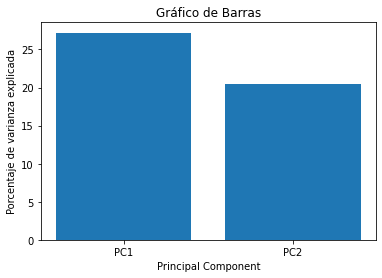

In [ ]:
## cuanta varianza explica cada componente
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
####
# grafico
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Principal Component')
plt.title('Gráfico de Barras')
plt.show()

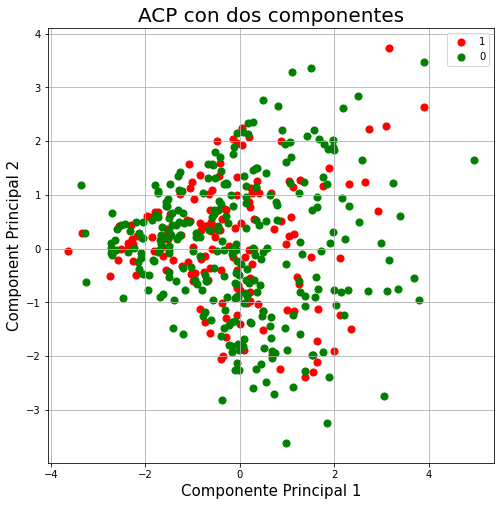

In [ ]:
## graficar
## primero concatenamos los datos de entrenamiento estandairzados con 
#la variable objetio para los mismo
dfGrafica =pd.concat([dfPrincipal, Entrena_clase[['Outcome']]],axis=1)
##################
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente Principal 1', fontsize = 15)
ax.set_ylabel('Component Principal 2', fontsize = 15)
ax.set_title('ACP con dos componentes', fontsize = 20)
targets = [1,0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = dfGrafica['Outcome'] == target
    ax.scatter(dfGrafica.loc[indicesToKeep, 'C1']
               , dfGrafica.loc[indicesToKeep, 'C2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
pca.explained_variance_ratio_
# juntos explican un 47.7% de la varianza

array([0.27211595, 0.20536509])

Dado que la varianza explicada por las dos primeras componentes es menos del 50% notamos que la gráfica de PCA no es muy represntativa aún asi vemos que las clases no se diferencian con faiclidad en el gráfico.

Dado esto probamos diferentes maneras de setear el KNN dado es en algunos textos se recomienda usar k como la raiz de la cantidad de datos así

In [ ]:
# cantidad de datos la raiz de los de entrenamiento
np.sqrt(576)

24.0

Como ha salido un número par sabemos que esto puede tner dificultad debido a que puede darse el caso en que la mitad sean de una clase y la mitad de otro así se recomienda que se un impar por ello tenemos que 23 o 25 como opción

In [12]:
from sklearn.neighbors import KNeighborsClassifier


In [17]:
# creación del modelo clasificador 25
clasificador_25 = KNeighborsClassifier(n_neighbors=25)
clasificador_25.fit(Entrena,Entrena_clase)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=25)

In [18]:
# creación del modelo clasificador 23
clasificador = KNeighborsClassifier(n_neighbors=23)
clasificador.fit(Entrena,Entrena_clase)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=23)

Usaremos k-folds como metodo de validación cruzada para tener una idea del desempeño de nuestro metodo KNN se recomienda usar un valor k entre 5 0 10 al se selecciona el 7 (al leer estudios de referencia donde se usa este más comúnmente al usar esta base, ademas se puede usar 8  0 9 si tenemos en cuenta el criterio de que porcentaje que da y los valores de que da por recomendaicones y pruebas  partir de 10 es mala idea pero 9 parece ser el mejor
)
> 1. depues de 7 no se distingue entre trabajar con 23 o 25 vecinos cercanos
> 2. con 7 queda el 10.6% para validacion 25% para test y 64.4 para entrenamiento los datos
> con 20% para test parece quedar mejor la partición de los datos y con 8 de k 

In [19]:
from sklearn.model_selection import cross_val_score

In [32]:
# accuarency
print(cross_val_score(clasificador_25,
                       Entrena,Entrena_clase,cv=8).mean())

0.7586805555555556


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [33]:
 # accuarency
 print(cross_val_score(clasificador,
                       Entrena,Entrena_clase,cv=8).mean())

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

0.7586805555555556


Dado lo anterior se decide seguir y probar distintos configuraciones con k=23

In [24]:
# creación del modelo clasificador y city block
clasificador3 = KNeighborsClassifier(n_neighbors=23,p=1)
clasificador3.fit(Entrena,Entrena_clase)
# accuarency
print(cross_val_score(clasificador3,
                       Entrena,Entrena_clase,cv=7).mean())

0.7499895050585618


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

## intento ponderando por la distancia

In [25]:
# creación del modelo clasificador
clasificador2 = KNeighborsClassifier(n_neighbors=23,weights="distance")
clasificador2.fit(Entrena,Entrena_clase)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=23, weights='distance')

In [26]:
# accuarency por kfolds
print(cross_val_score(clasificador2,
                       Entrena,Entrena_clase,cv=7).mean())

0.7604214768481592


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam


 > ## city block distance
 



In [27]:
# creación del modelo clasificador y city block
clasificador4 = KNeighborsClassifier(n_neighbors=23,weights="distance",p=1)
clasificador4.fit(Entrena,Entrena_clase)
# accuarency
print(cross_val_score(clasificador4,
                       Entrena,Entrena_clase,cv=7).mean())

0.7499895050585618


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

## pasando los datos de prueba para predecir con KNN

In [28]:
## usamos clasificador 2
predicciones = clasificador2.predict(prueba)
predicciones

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

# Metricas para comparar metodos

In [ ]:
# librerias
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
## creando la matriz de confusión
matriz= confusion_matrix(prueba_clase,predicciones)
matriz = pd.DataFrame(matriz,
                      columns=['0 : NO','1 : SI'])
matriz

,0 : NO,1 : SI
0,109,17
1,23,43


In [ ]:
## crando accuracy con matriz de confusion
accuracy = accuracy_score(prueba_clase,predicciones)
accuracy

0.7916666666666666

In [ ]:
# precisión
precision = precision_score(prueba_clase,predicciones)
precision

0.7166666666666667

# Regresión Logistica

In [13]:
 from sklearn.linear_model import LogisticRegression

In [14]:
# crear modelo
RegLogi = LogisticRegression().fit(Entrena,Entrena_clase)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
#imprimiento parametros
print(f"intercepto (b) : {RegLogi.intercept_}")
print(f"pendiente (w) : {RegLogi.coef_}")

intercepto (b) : [-0.8201488]
pendiente (w) : [[ 0.45935619  1.05071709 -0.14575804 -0.01598176 -0.10397263  0.68847425
   0.3328873   0.20839121]]


In [ ]:
# accuarency por kfolds
print(cross_val_score(RegLogi,
                       Entrena,Entrena_clase,cv=7).mean())

0.7603375173166534


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

## pasando los datos de prueba para predecir con REG. Logistica

In [ ]:
## usamos RegLogi
predicciones_reg = RegLogi.predict(prueba)
predicciones_reg

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
# probabilidades
print(RegLogi.predict_proba(prueba))

[[0.86988911 0.13011089]
 [0.93092235 0.06907765]
 [0.90672542 0.09327458]
 [0.59671363 0.40328637]
 [0.76417711 0.23582289]
 [0.14169562 0.85830438]
 [0.40830636 0.59169364]
 [0.63907982 0.36092018]
 [0.08079141 0.91920859]
 [0.80786188 0.19213812]
 [0.47615766 0.52384234]
 [0.94896501 0.05103499]
 [0.80798858 0.19201142]
 [0.95144859 0.04855141]
 [0.88482481 0.11517519]
 [0.31001019 0.68998981]
 [0.09882798 0.90117202]
 [0.03802846 0.96197154]
 [0.96617871 0.03382129]
 [0.96114059 0.03885941]
 [0.89235907 0.10764093]
 [0.26596224 0.73403776]
 [0.77306492 0.22693508]
 [0.10190452 0.89809548]
 [0.826427   0.173573  ]
 [0.67415498 0.32584502]
 [0.90484897 0.09515103]
 [0.56400056 0.43599944]
 [0.72593765 0.27406235]
 [0.80046095 0.19953905]
 [0.28145683 0.71854317]
 [0.95228504 0.04771496]
 [0.71435868 0.28564132]
 [0.96301615 0.03698385]
 [0.45027192 0.54972808]
 [0.60319195 0.39680805]
 [0.5418584  0.4581416 ]
 [0.5048244  0.4951756 ]
 [0.90229923 0.09770077]
 [0.3558285  0.6441715 ]


In [ ]:
#parametros
print(RegLogi.intercept_, RegLogi.coef_)

[-0.8201488] [[ 0.45935619  1.05071709 -0.14575804 -0.01598176 -0.10397263  0.68847425
   0.3328873   0.20839121]]


# Metricas para comparar metodos





In [ ]:
## creando la matriz de confusión
matriz= confusion_matrix(prueba_clase,predicciones_reg)
matriz = pd.DataFrame(matriz,
                      columns=['0 : NO','1 : SI'])
matriz

,0 : NO,1 : SI
0,112,14
1,21,45


In [ ]:
## crando accuracy con matriz de confusion
accuracy_reg = accuracy_score(prueba_clase,predicciones_reg)
accuracy_reg

0.8177083333333334

In [ ]:
# precisión
precision_reg = precision_score(prueba_clase,predicciones_reg)
precision_reg

0.7627118644067796